In [4]:
set.seed(222)

V tomto cvičení se podívám na údaje o cereáliích.

In [5]:
cereal = read.csv("cereal.csv", header = TRUE, sep = ";")

Vybereme pouze ty proměnné, které udávají hmotnost určité látky v daném produktu.

In [6]:
cervals = cereal[5:(ncol(cereal)-5)][2:nrow(cereal),]

In [7]:
head(cervals)

,protein,fat,sodium,fiber,carbo,sugars,potass
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2,4,1,130,10,5,6,280
3,3,5,15,2,8,8,135
4,4,1,260,9,7,5,320
5,4,0,140,14,8,0,330
6,2,2,200,1,14,8,-1
7,2,2,180,1.5,10.5,10,70


In [8]:
cermat = matrix(NA, nrow = nrow(cervals), ncol = ncol(cervals))

for (i in 1:nrow(cervals)){
    
    cermat[i,] = as.numeric(as.character(unlist((cervals[i,]))))
}

In [9]:
head(cermat)

4,1,130,10.0,5.0,6,280
3,5,15,2.0,8.0,8,135
4,1,260,9.0,7.0,5,320
4,0,140,14.0,8.0,0,330
2,2,200,1.0,14.0,8,-1
2,2,180,1.5,10.5,10,70


In [10]:
nrow(cermat)

[1] 77

In [11]:
round(colMeans(cermat),digits = 3)

[1]   2.545   1.013 159.675   2.152  14.597   6.922  96.078

Proměnné  `sodium` a `potass` (3. a 7. sloupec) jsou uvedené v miligramech, zatímco ostatní proměnné jsou v gramech. Máme tedy rozdíl v měřítku a je na místě použít při PCA standardizaci.

In [12]:
pca = prcomp(cermat, scale. = TRUE)

In [13]:
summary(pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5    PC6     PC7
Standard deviation     1.6078 1.2602 1.0632 0.9401 0.62123 0.6051 0.24663
Proportion of Variance 0.3693 0.2269 0.1615 0.1262 0.05513 0.0523 0.00869
Cumulative Proportion  0.3693 0.5962 0.7576 0.8839 0.93901 0.9913 1.00000

Vidíme, že první čtyři hlavní komponenty vysvětlují skoro 90% rozptylu. Pokud budeme uvažovat pouze tyto čtyři, snížili bychom dimenzionalitu ze 7 proměnných na 4. Kdybychom uvažovali tyto 4 lineární kombinace proměnných, ztratíme tím asi 11% informace obsažené v původních datech.

In [14]:
pca

Standard deviations (1, .., p=7):
[1] 1.6078216 1.2601639 1.0631779 0.9400522 0.6212310 0.6050605 0.2466277

Rotation (n x k) = (7 x 7):
            PC1         PC2         PC3        PC4        PC5          PC6
[1,] -0.4380818  0.28817970 -0.07293533  0.4447410 -0.3666536  0.615754099
[2,] -0.1973057 -0.44195518 -0.25826446  0.7076448  0.3035743 -0.309531560
[3,]  0.1324742  0.13729260 -0.85787869 -0.1121474 -0.4035731 -0.226555594
[4,] -0.5521359  0.16874221 -0.05903906 -0.3426236  0.1751083 -0.227954306
[5,]  0.3480252  0.49026800 -0.27863228  0.1193130  0.6730810  0.282260947
[6,]  0.0343041 -0.65601783 -0.27776742 -0.3245842  0.1283311  0.584793292
[7,] -0.5696077  0.05985637 -0.18370565 -0.2277845  0.3322149  0.009595023
             PC7
[1,] -0.09129442
[2,] -0.10157370
[3,]  0.02949210
[4,] -0.68056549
[5,] -0.11804610
[6,] -0.16583768
[7,]  0.68983471

Pokud se podíváme na první PC, vidíme, že největší váhu zde mají proměnné číslo 1,4,5 a 7, tedy obsah bílkovin, vlákniny, sacharidů a draslíku.
<br>
Můžeme zde (nahoře) také vidět jednotlivé směrodatné odchylky. Jelikož jsme použili standardizaci, dle Kayserova kritéria bychom jako "důležité" vyhodnotili ty hlavní komponenty, pro které sd>1, tedy 1.,2. a 3. hlavní komponentu.

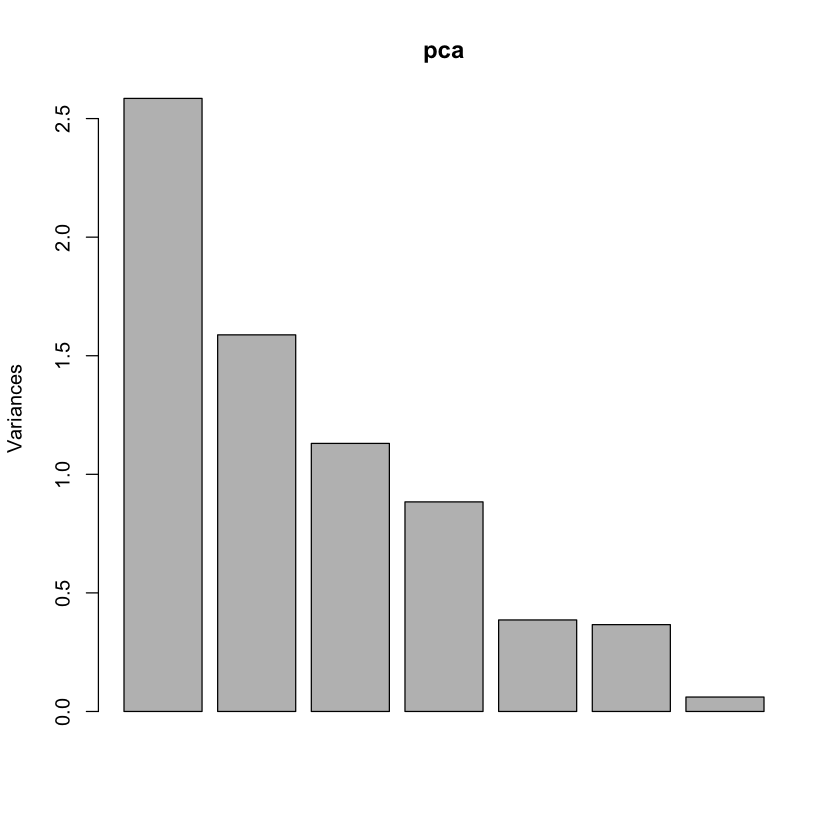

In [15]:
plot(pca)

Pokud se podíváme na důležitost hlavních komponent, vidíme, že první komponenta je zdaleka nejdůležitější, u páté PC vidíme značný skok dolů (tento graf je v podstatě vizualizací informací obsažených v `summary(pca)`).

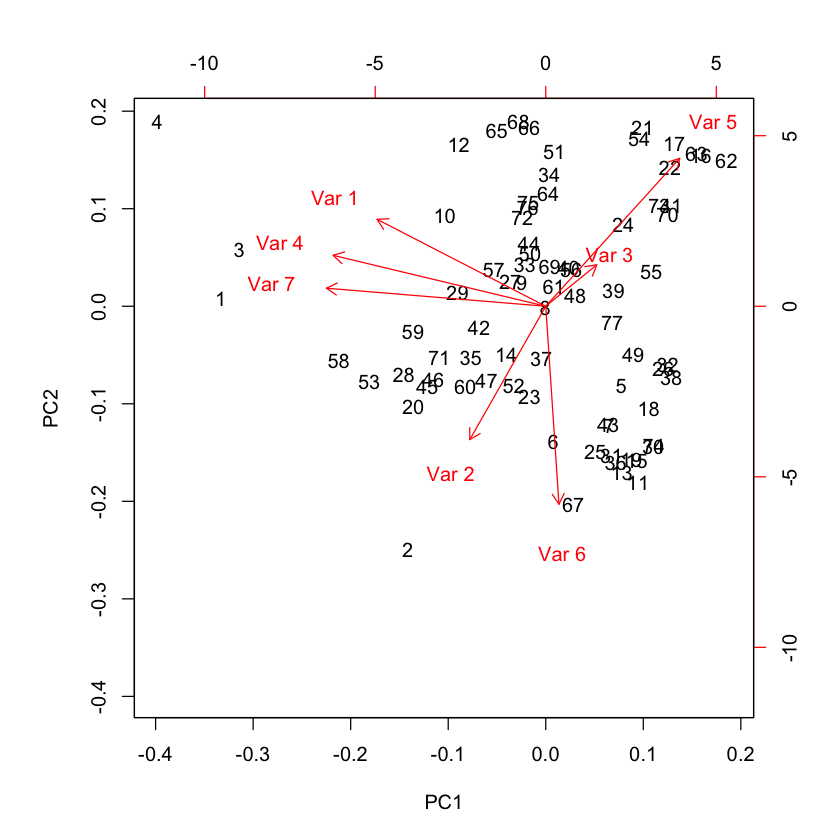

In [16]:
biplot(pca)

V biplotu máme v podstatě znázorněné lineární kombinace pro PC1 a PC2, jejichž zápis je uveden a popsán výše. Je také vidět, že pro PC2 je důležitá 2., 5. a 6. proměnná.